## Data Preprocessing

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as st


## Import Data

In [2]:

data= pd.read_csv('Table - IN_Table.csv.csv')
data.describe()

IN1           IN2           IN3           IN4           IN5  \
count  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04   
mean  -3.911535e-12 -1.658765e-12 -2.405762e-12  2.957421e-12  1.521103e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.696646e+00 -3.437986e+00 -2.639204e+00 -2.354538e+00 -1.934470e+00   
25%   -3.385843e-01 -9.371822e-01 -3.013195e-01 -8.791605e-01 -7.130980e-01   
50%    3.617588e-01  5.709954e-01  2.248603e-01  5.034075e-01 -4.158845e-02   
75%    6.842442e-01  7.610581e-01  4.011428e-01  8.862316e-01  5.721888e-01   
max    1.590639e+00  1.939639e+00  1.844610e+00  1.654608e+00  3.615581e+00   

               Out1          Out2  
count  1.440100e+04  1.440100e+04  
mean   3.521351e-11  8.724543e-13  
std    1.000000e+00  1.000000e+00  
min   -5.201644e+00 -5.989071e+00  
25%   -5.060039e-01 -5.130819e-01  
50%    1.648018e-01 -3.687546e-03  
75%    6.439487e-01  5.057068e-01  
max    1.396423e+01  7.637227e+00

In [3]:
data.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.500407  0.924350  0.438273  0.455514  0.624829  0.381853
IN2   0.500407  1.000000  0.321950  0.895081  0.081605  0.388346  0.201564
IN3   0.924350  0.321950  1.000000  0.197927  0.365890  0.572199  0.415136
IN4   0.438273  0.895081  0.197927  1.000000  0.013679  0.301107  0.203665
IN5   0.455514  0.081605  0.365890  0.013679  1.000000  0.428711  0.101761
Out1  0.624829  0.388346  0.572199  0.301107  0.428711  1.000000 -0.151741
Out2  0.381853  0.201564  0.415136  0.203665  0.101761 -0.151741  1.000000

## Removing the outliers


In [4]:
#the median method gave higher accuracy than the mean.
def outlier(data):
    for column in data.columns:
        data[column] = data[column].astype(float)
        mean = st.median(data[column])
        std_dev = np.std(data[column])
        lower_bound = mean - 3.21 * std_dev
        upper_bound = mean + 3.21 * std_dev
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data
data_c = outlier(data)
data_c.describe()

IN1           IN2           IN3           IN4           IN5  \
count  14176.000000  14176.000000  14176.000000  14176.000000  14176.000000   
mean       0.009382      0.014270      0.006200      0.015347     -0.000104   
std        0.992595      0.994712      0.991941      0.995247      0.990093   
min       -2.696646     -2.534229     -2.631096     -2.354538     -1.934470   
25%       -0.296903     -0.921675     -0.295194     -0.878523     -0.709896   
50%        0.365294      0.607283      0.225387      0.512090     -0.040223   
75%        0.683844      0.762325      0.400967      0.887047      0.572440   
max        1.590639      1.939639      1.844610      1.654608      3.161070   

               Out1          Out2  
count  14176.000000  14176.000000  
mean      -0.000980     -0.007083  
std        0.934781      0.906343  
min       -2.997568     -3.060053  
25%       -0.506004     -0.513082  
50%        0.164802     -0.003688  
75%        0.643949      0.505707  
max        3.327171      3.052678

###Plotting The Graphs

In [5]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1),s=2)
    plt.title(col)

plt.tight_layout()

plt.show()

In [6]:
data_c.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.506149  0.923903  0.443309  0.456284  0.671510  0.434053
IN2   0.506149  1.000000  0.328303  0.896780  0.075256  0.408026  0.244803
IN3   0.923903  0.328303  1.000000  0.202082  0.368440  0.624368  0.455896
IN4   0.443309  0.896780  0.202082  1.000000  0.014609  0.326593  0.234142
IN5   0.456284  0.075256  0.368440  0.014609  1.000000  0.447622  0.138358
Out1  0.671510  0.408026  0.624368  0.326593  0.447622  1.000000 -0.025025
Out2  0.434053  0.244803  0.455896  0.234142  0.138358 -0.025025  1.000000

### Error Details

In [7]:
def results(Y_pred,Y_test,M):
  from sklearn.metrics import mean_squared_error,r2_score

  SSE= mean_squared_error(Y_pred,Y_test)
  MSE= np.mean((y1_test - y1_pred) **2)
  n=len(Y_test)

  AIC = M*2         +n*(np.log(SSE/n))
  BIC = M*np.log(n) +n*(np.log(SSE/n))


  print('R2  : ', r2_score(Y_pred,Y_test))
  print('SSE : ', SSE )
  print('MSE : ', MSE )

  print('aic : ', AIC)
  print('bic : ', BIC)

# Plot

In [8]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data_c.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1), s=2)
    plt.title(col)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.3)
    plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(left=0)

plt.tight_layout()
plt.show()


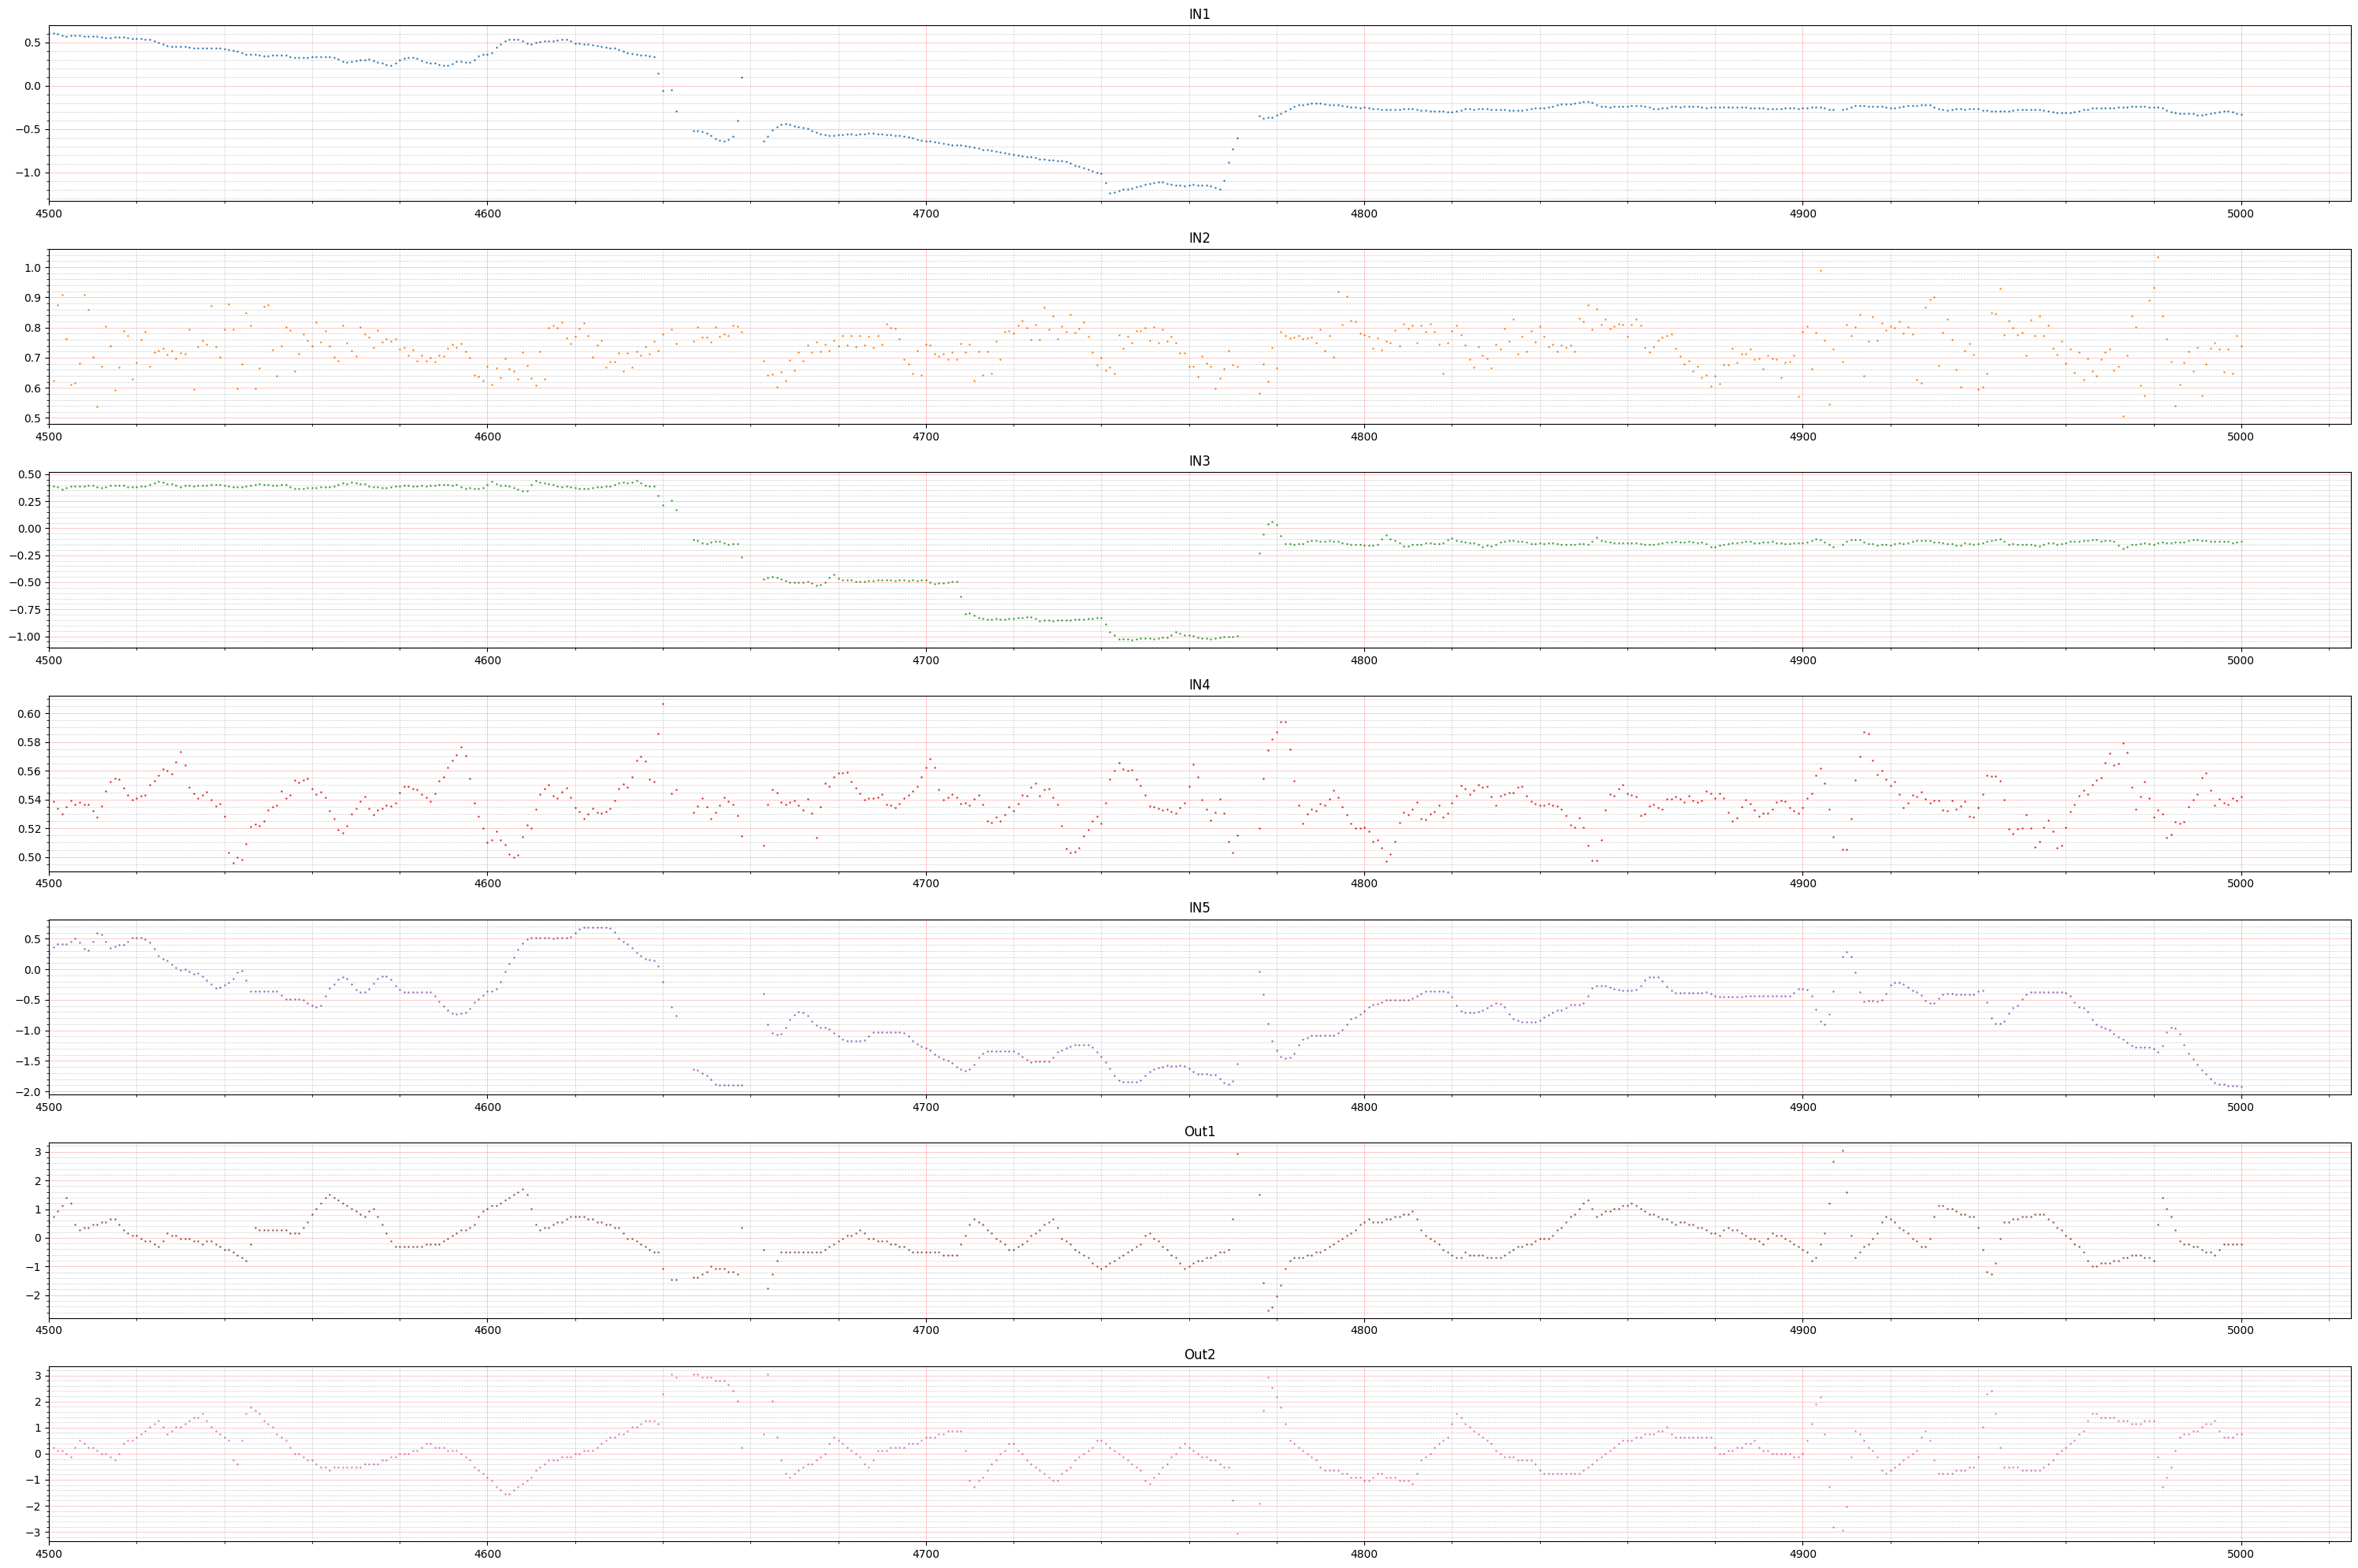

In [9]:
illust_data = data_c[(data_c.index >= 4500) & (data_c.index <= 5000)]
plt.figure(figsize=(30, 20))

for i, col in enumerate(illust_data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(illust_data.index, illust_data[col], marker='.', color='C{}'.format(i-1), s=2)
    plt.title(col)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.3)
    plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(left=4500)


plt.tight_layout()
plt.show()


# Error And Plot

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import pi, log

def result(y_test, y_pred, k):
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    SSE = mean_squared_error(y_test, y_pred) * n
    MAE = mean_absolute_error(y_test, y_pred)
    aic = 2 * k + n * log(2 * pi) + n * log(SSE / n) + n
    bic = k * log(n) + n * log(2 * pi) + n * log(SSE / n) + n

    # Print metrics
    print('R2 Score:', r2)
    print('SSE:', SSE)
    print('MAE:', MAE)
    print('AIC:', aic)
    print('BIC:', bic)

    # Plot actual vs predicted values
    plt.figure(figsize=(24, 6))
    start_index, end_index = 1000, 1300
    plt.plot(range(start_index, end_index), y_test[start_index:end_index], color='blue', label='Actual SO2', linewidth=1.5)
    plt.plot(range(start_index, end_index), y_pred[start_index:end_index], color='red', label='Predicted SO2', linewidth=1.5)

    # Add labels, title, and legend
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('SO2 Value', fontsize=12)
    plt.title(f'SO2 Actual vs Predicted (Indices {start_index}-{end_index})', fontsize=14)
    plt.legend(fontsize=12)

    # Add grids
    plt.grid(which='major', linestyle=':', linewidth=0.7, color='gray', alpha=0.8)
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.5)
    plt.minorticks_on()

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    # Add the R2 score
    plt.text(
        end_index - 50,
        max(y_test[start_index:end_index]),
        f"$R^2$ = {r2:.4f}",
        fontsize=12,
        color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

    # Show the plot
    plt.tight_layout()
    plt.show()


# KNN

In [11]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out2']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
y_pred_knn = knn.predict(X_test)

R2 Score: 0.496096954770457
SSE: 1152.4485692933376
MAE: 0.4252137293528299
AIC: 5504.38508419553
BIC: 5534.135833633789


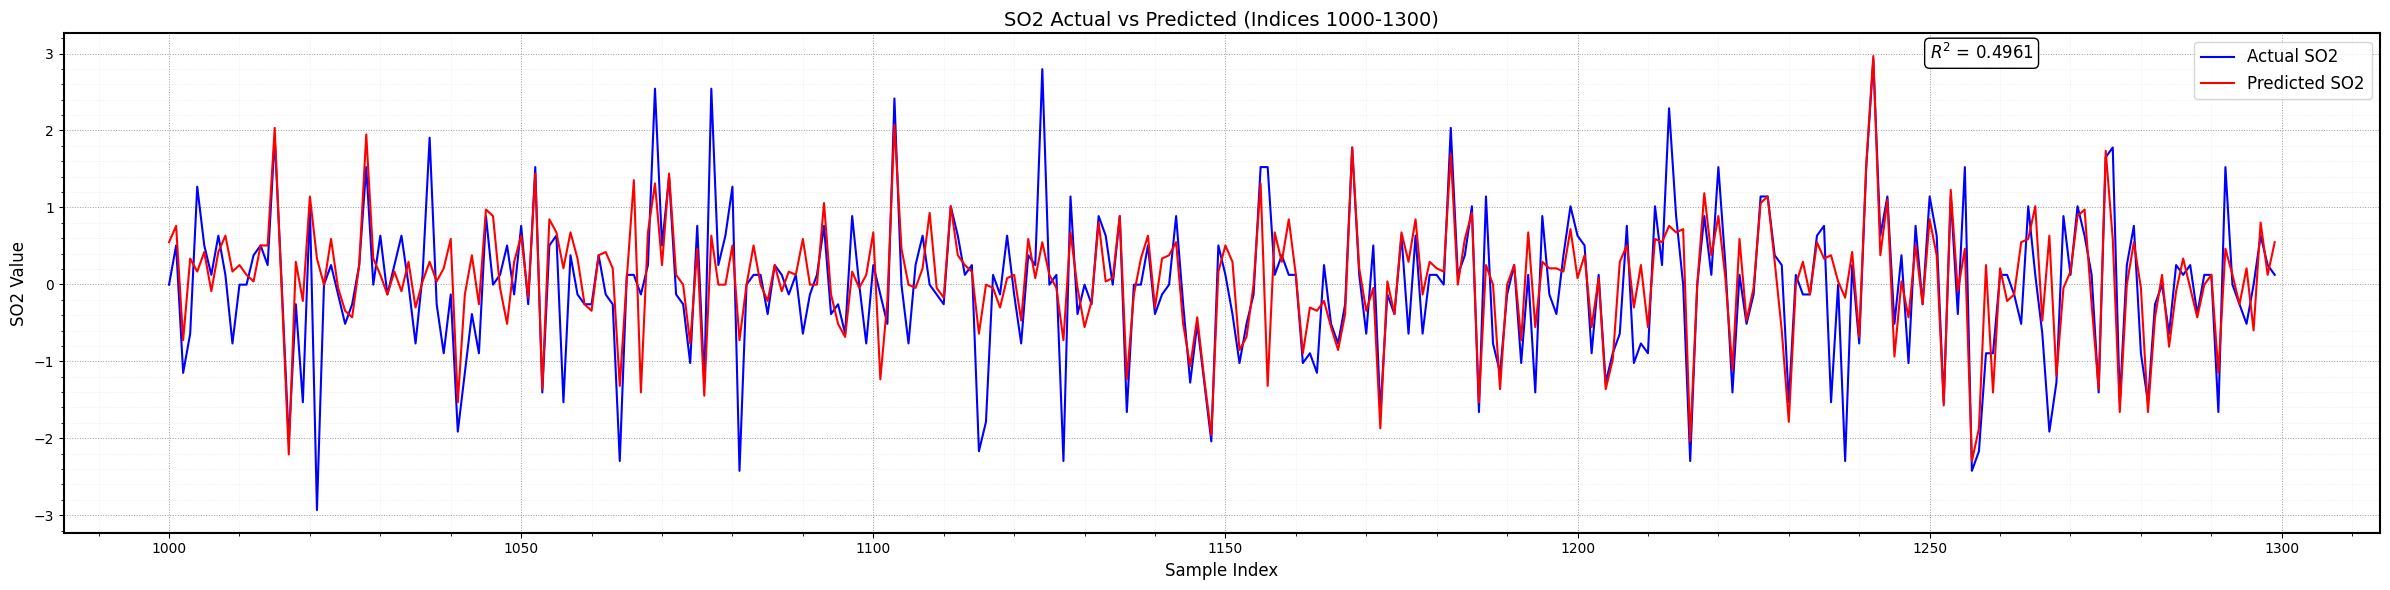

In [15]:
result(y_test,y_pred_knn,5)

# Polynomial Regression

In [16]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_poly = poly_reg.predict(X_test)

R2 Score: 0.6819383140841593
SSE: 761.1125385244363
MAE: 0.38440353024733115
AIC: 4327.833845397652
BIC: 4357.584594835912


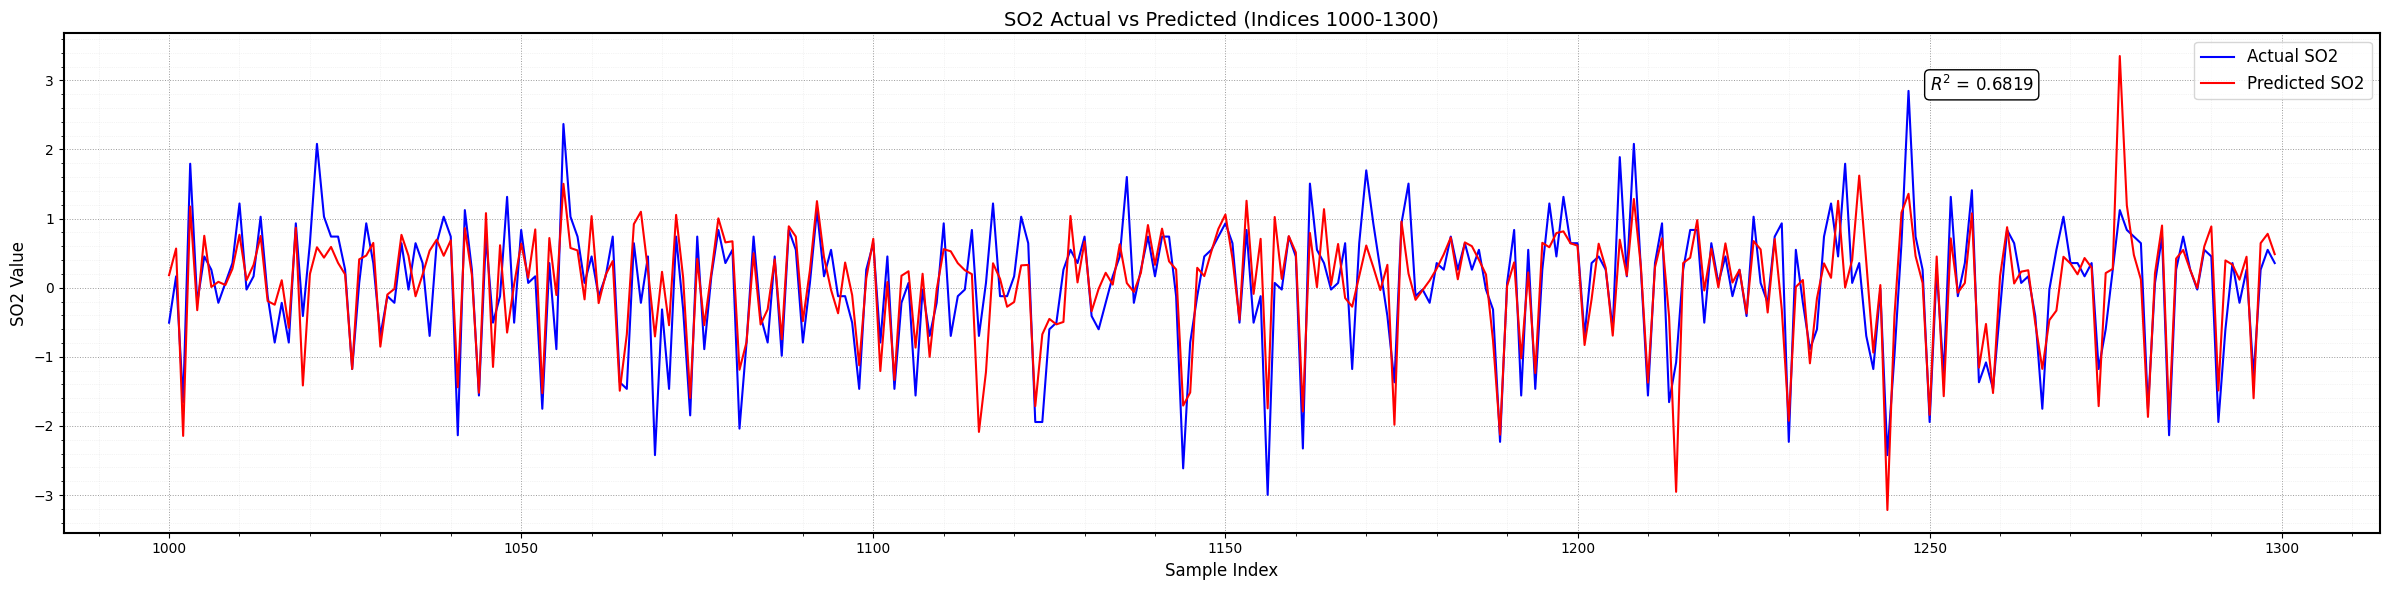

In [21]:
result(y_test,y_pred_poly,5)

# Linear Regression

In [22]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred_lin = lin_reg.predict(X_test)

R2 Score: 0.5018031909037723
SSE: 1192.1707481495778
MAE: 0.47383113314315556
AIC: 5600.488428808438
BIC: 5630.239178246698


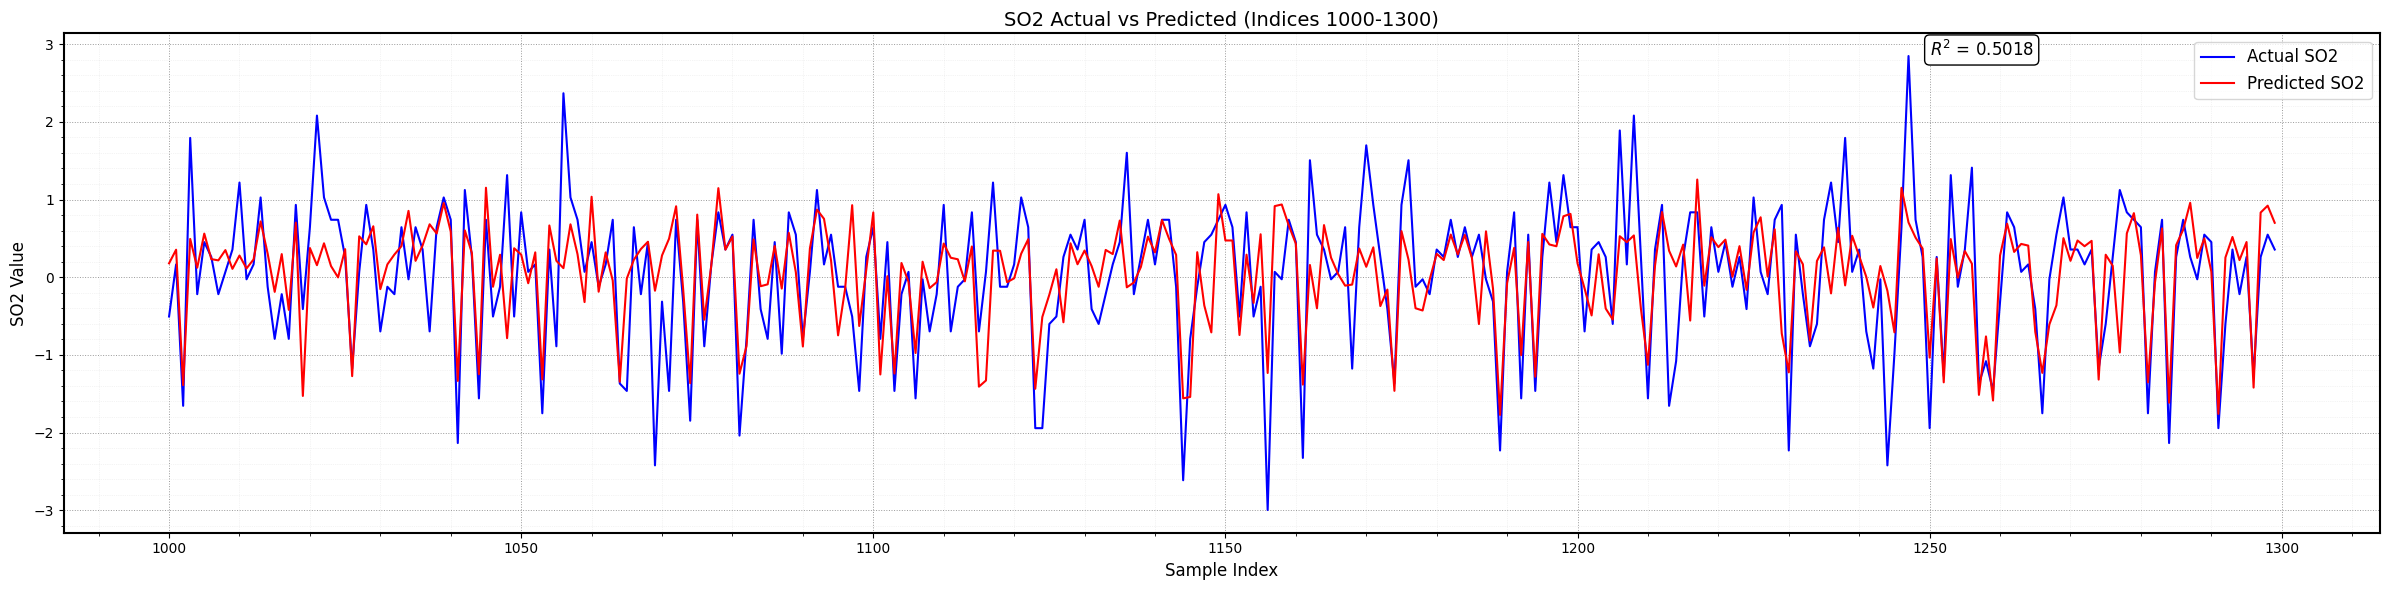

In [26]:
result(y_test,y_pred_lin,5)

# Early Stopping Funtion

In [27]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="loss",
    min_delta = 0.0001,
    patience = 200,
    restore_best_weights = True,
)

In [28]:
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = self.model.predict(val_x)
        r2 = r2_score(val_y, val_predictions)
        self.r2_scores.append(r2)
        if epoch % 20 == 0 and epoch != 0:
            print(f"Epoch {epoch}: R2 Score = {r2}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        plt.plot(self.r2_scores, label='R² Score')
        plt.xlabel('Epoch')
        plt.ylabel('R2 Score')
        plt.title('R2 Score over Epochs')
        plt.legend()
        plt.show()



# Neural Network

In [29]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Epoch 1/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.4796 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4794 - mae: 0.5051
Epoch 2/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.4168 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4164 - mae: 0.4719
Epoch 3/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.3855 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3855 - mae: 0.4582
Epoch 4/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.3902 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3901 - mae: 0.4601
Epoch 5/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.3694 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3693 - mae: 0.4483
Epoch 6/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.3477 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3478 - mae: 0.4311
Epoch 7/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.3480 - mae: 0.4
709/709 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 39/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2426 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2427 - mae: 0.3647
Epoch 40/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.2604 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2605 - mae: 0.3723
Epoch 41/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2644 - mae: 0.3
Epoch 40: R2 Score = 0.6766106011309339
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2644 - mae: 0.3719
Epoch 42/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.2532 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2533 - mae: 0.3698
Epoch 43/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.2536 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2538 - mae: 0.3687
Epoch 44/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.2664 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2662 - mae: 0.3729
Epoch 45/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.2257 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2257 - mae: 0.3453
Epoch 77/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.2251 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2249 - mae: 0.3438
Epoch 78/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2114 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2116 - mae: 0.3347
Epoch 79/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2157 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2157 - mae: 0.3419
Epoch 80/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2066 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2067 - mae: 0.3308
Epoch 81/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2099 - mae: 0.3
Epoch 80: R2 Score = 0.7132782747007071
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2099 - mae: 0.3332
Epoch 82/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2096 - mae: 0

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1966 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1967 - mae: 0.3169
Epoch 114/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.1923 - mae:
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1924 - mae: 0.3174
Epoch 115/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.1973 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1972 - mae: 0.3208
Epoch 116/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.1848 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1848 - mae: 0.3097
Epoch 117/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1857 - mae: 0
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1858 - mae: 0.3110
Epoch 118/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1825 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1826 - mae: 0.3084
Epoch 119/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1850 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.1758 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1758 - mae: 0.3034
Epoch 151/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.1751 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1751 - mae: 0.3000
Epoch 152/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.1735 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1735 - mae: 0.3014
Epoch 153/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.1786 - mae: 0.3
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1787 - mae: 0.3034
Epoch 154/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1685 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1688 - mae: 0.2945
Epoch 155/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.1687 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1689 - mae: 0.2931
Epoch 156/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.1683 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1672 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1672 - mae: 0.2931
Epoch 188/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1657 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1657 - mae: 0.2882
Epoch 189/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.1532 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1533 - mae: 0.2836
Epoch 190/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.1580 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1582 - mae: 0.2835
Epoch 191/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.1659 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1659 - mae: 0.2885
Epoch 192/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.1504 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1509 - mae: 0.2780
Epoch 193/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1558 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.1583 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1582 - mae: 0.2797
Epoch 225/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1524 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1525 - mae: 0.2766
Epoch 226/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1477 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1477 - mae: 0.2740
Epoch 227/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.1562 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1562 - mae: 0.2778
Epoch 228/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.1457 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1458 - mae: 0.2684
Epoch 229/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 0.1498 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1499 - mae: 0.2781
Epoch 230/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1460 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1548 - mae: 0.2
Epoch 260: R2 Score = 0.75916251217962
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1546 - mae: 0.2707
Epoch 262/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1344 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1347 - mae: 0.2625
Epoch 263/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1424 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1425 - mae: 0.2671
Epoch 264/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1431 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1433 - mae: 0.2695
Epoch 265/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1426 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1426 - mae: 0.2634
Epoch 266/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.1484 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1484 - mae: 0.2712
Epoch 267/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1403

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.1334 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1335 - mae: 0.2598
Epoch 299/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.1366 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1367 - mae: 0.2588
Epoch 300/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.1327 - mae: 0.2
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1328 - mae: 0.2577


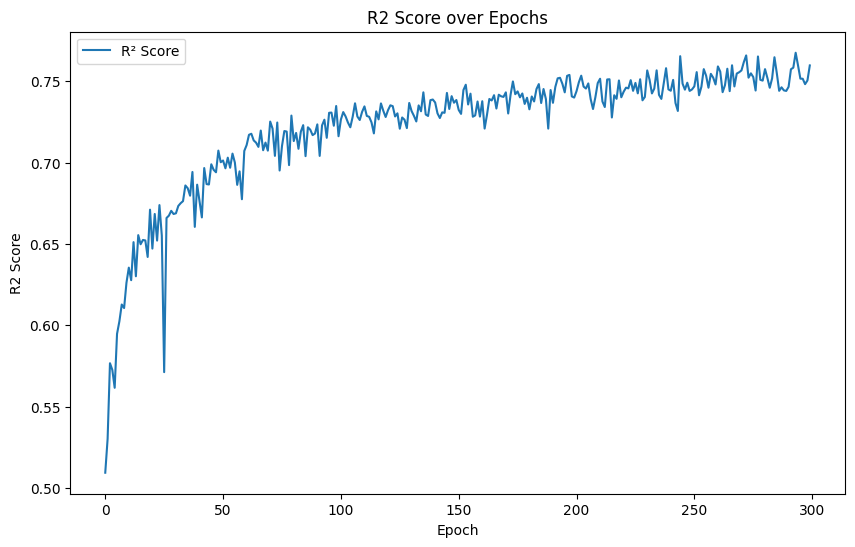

In [30]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
#first layer
#ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
#second layer
#ann.add(tf.keras.layers.Dense(units = 50,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

#output
ann.add(tf.keras.layers.Dense(units=1))
#compiling
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
ann.fit(X_train,y_train,batch_size = 16,callbacks = [r2_callback],epochs = 300)


In [31]:
ann_df = pd.DataFrame(ann.history.history)
ann_df['loss'].plot()

<Axes: >

In [32]:
y_pred_ann = ann.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


R2 Score: 0.7597732907797468
SSE: 574.8556603085415
MAE: 0.32117387762802535
AIC: 3531.875716827675
BIC: 3561.626466265935


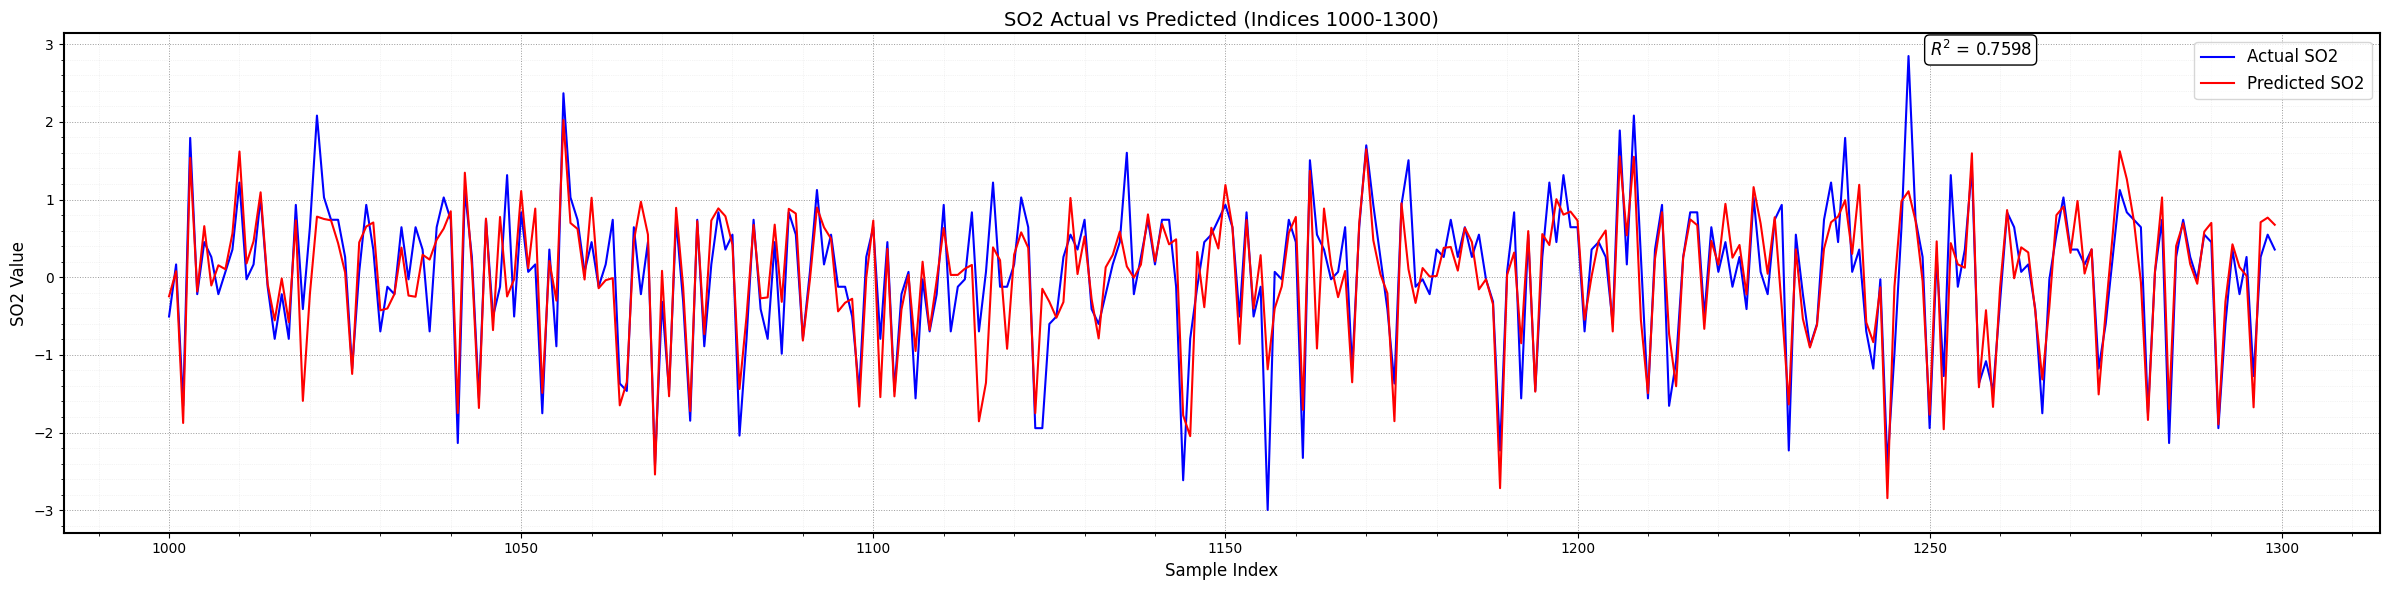

In [33]:
result(y_test,y_pred_ann,5)

In [34]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,505 (5.77 MB)

 Trainable params: 504,501 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,009,004 (3.85 MB)

# LSTM - timesteps

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = data_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = data_c.loc[:, 'Out1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

lstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=50 ,activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    #layers.LSTM(units=50 activation='tanh',return_sequences = True),
    #layers.Dropout(0.05),
    layers.LSTM(units=50,activation='tanh'),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))

lstm_model.fit(X_train, y_train, batch_size=32,callbacks = [r2_callback], epochs=1000)


Epoch 1/1000


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   - loss: 0.5323 - mae: 0
355/355 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5296 - mae: 0.5467
Epoch 2/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.4477 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4477 - mae: 0.4933
Epoch 3/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.4171 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4178 - mae: 0.4789
Epoch 4/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.4333 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4334 - mae: 0.4824
Epoch 5/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.4372 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4371 - mae: 0.4819
Epoch 6/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.4230 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4232 - mae: 0.4794
Epoch 7/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.4200 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.3489 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3488 - mae: 0.4355
Epoch 39/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3459 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3459 - mae: 0.4306
Epoch 40/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3294 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3297 - mae: 0.4289
Epoch 41/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.3423 - mae: 0.4
Epoch 40: R2 Score = 0.6295836875326505
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3423 - mae: 0.4330
Epoch 42/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3445 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3443 - mae: 0.4378
Epoch 43/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.3343 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3343 - mae: 0.4281
Epoch 44/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.335

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.3064 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3063 - mae: 0.4092
Epoch 76/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.2971 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2972 - mae: 0.4067
Epoch 77/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.3087 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3085 - mae: 0.4128
Epoch 78/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.3048 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3048 - mae: 0.4115
Epoch 79/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3086 - mae: 0
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3084 - mae: 0.4122
Epoch 80/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2912 - mae: 0.4
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2912 - mae: 0.4049
Epoch 81/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.2905 - mae: 0.4
Epoch 80: R2 Score = 0.669040

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2836 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2832 - mae: 0.3948
Epoch 113/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2764 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2763 - mae: 0.3887
Epoch 114/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.2863 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2858 - mae: 0.3952
Epoch 115/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2814 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2811 - mae: 0.3916
Epoch 116/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.2775 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2775 - mae: 0.3925
Epoch 117/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2643 - mae: 0
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2647 - mae: 0.3798
Epoch 118/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2780 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━

Epoch 149/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.2527 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2527 - mae: 0.3738
Epoch 150/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.2544 - mae: 0
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2544 - mae: 0.3748
Epoch 151/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2602 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2597 - mae: 0.3715
Epoch 152/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.2468 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2471 - mae: 0.3693
Epoch 153/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.2450 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2450 - mae: 0.3658
Epoch 154/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.2595 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2592 - mae: 0.3762
Epoch 155/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.2503 - mae: 0.3
355/355 

Epoch 186/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.2390 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2390 - mae: 0.3628
Epoch 187/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2300 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2300 - mae: 0.3531
Epoch 188/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2259 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2263 - mae: 0.3519
Epoch 189/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.2422 - mae: 0.35
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2417 - mae: 0.3595
Epoch 190/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2316 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2318 - mae: 0.3565
Epoch 191/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.2302 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2304 - mae: 0.3568
Epoch 192/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2319 - mae: 0.3
355/3

Epoch 223/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2233 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2234 - mae: 0.3508
Epoch 224/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2172 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2173 - mae: 0.3452
Epoch 225/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2202 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2202 - mae: 0.3441
Epoch 226/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.2225 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2227 - mae: 0.3491
Epoch 227/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.2293 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2291 - mae: 0.3549
Epoch 228/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2348 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2347 - mae: 0.3520
Epoch 229/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.2169 - mae: 0.3
355/35

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2039 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2040 - mae: 0.3334
Epoch 261/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.2178 - mae: 0.3
Epoch 260: R2 Score = 0.7312199909549244
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2177 - mae: 0.3416
Epoch 262/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.2085 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2096 - mae: 0.3402
Epoch 263/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2126 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2128 - mae: 0.3412
Epoch 264/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.2146 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2145 - mae: 0.3407
Epoch 265/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.2094 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2096 - mae: 0.3393
Epoch 266/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss

Epoch 297/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.2087 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2087 - mae: 0.3334
Epoch 298/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.2069 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2070 - mae: 0.3335
Epoch 299/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2079 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2079 - mae: 0.3354
Epoch 300/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.2131 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2129 - mae: 0.3386
Epoch 301/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.2027 - mae: 0.3
Epoch 300: R2 Score = 0.7469149370627208
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2029 - mae: 0.3321
Epoch 302/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.2014 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2015 - mae: 0.3294
Epoch 303/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 87

Epoch 334/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.1960 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1962 - mae: 0.3245
Epoch 335/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1902 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1908 - mae: 0.3219
Epoch 336/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1938 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1939 - mae: 0.3239
Epoch 337/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.2039 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2036 - mae: 0.3287
Epoch 338/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1927 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1930 - mae: 0.3231
Epoch 339/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1986 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1987 - mae: 0.3262
Epoch 340/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.1994 - mae: 0.3
355/35

Epoch 371/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.1962 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1962 - mae: 0.3254
Epoch 372/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1788 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1791 - mae: 0.3110
Epoch 373/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1964 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1963 - mae: 0.3240
Epoch 374/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1987 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1986 - mae: 0.3257
Epoch 375/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1868 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1869 - mae: 0.3162
Epoch 376/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1938 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1938 - mae: 0.3217
Epoch 377/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1926 - mae: 0.3
355/35

Epoch 408/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1849 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1849 - mae: 0.3151
Epoch 409/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1919 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1917 - mae: 0.3167
Epoch 410/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1925 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1925 - mae: 0.3212
Epoch 411/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.1789 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1791 - mae: 0.3128
Epoch 412/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1877 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1878 - mae: 0.3184
Epoch 413/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1939 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1936 - mae: 0.3178
Epoch 414/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1869 - mae: 0.3
355/35

Epoch 445/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.1798 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1800 - mae: 0.3105
Epoch 446/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1879 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1875 - mae: 0.3130
Epoch 447/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1746 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1747 - mae: 0.3079
Epoch 448/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1836 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1836 - mae: 0.3140
Epoch 449/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1883 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1882 - mae: 0.3134
Epoch 450/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1834 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1834 - mae: 0.3126
Epoch 451/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1825 - mae: 0.3
355/35

Epoch 482/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1892 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1887 - mae: 0.3146
Epoch 483/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.1710 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1713 - mae: 0.3022
Epoch 484/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1751 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1753 - mae: 0.3097
Epoch 485/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1714 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1716 - mae: 0.3042
Epoch 486/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1795 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1796 - mae: 0.3070
Epoch 487/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1809 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1807 - mae: 0.3099
Epoch 488/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1781 - mae: 0.3
355/35

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1733 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1733 - mae: 0.3058
Epoch 520/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.1741 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1740 - mae: 0.3003
Epoch 521/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1717 - mae: 0.3
Epoch 520: R2 Score = 0.7712473363821718
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1717 - mae: 0.3043
Epoch 522/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1620 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1625 - mae: 0.2938
Epoch 523/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1664 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1667 - mae: 0.2965
Epoch 524/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1682 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1683 - mae: 0.3001
Epoch 525/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss

Epoch 556/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1748 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1748 - mae: 0.3040
Epoch 557/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1695 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1695 - mae: 0.3004
Epoch 558/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1659 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1660 - mae: 0.2977
Epoch 559/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1650 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1650 - mae: 0.2984
Epoch 560/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1692 - mae: 0.30
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1691 - mae: 0.3008
Epoch 561/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.1651 - mae: 0.2
Epoch 560: R2 Score = 0.7669453217696087
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1652 - mae: 0.2941
Epoch 562/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Epoch 593/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.1625 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1625 - mae: 0.2936
Epoch 594/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1679 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1678 - mae: 0.2968
Epoch 595/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1664 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1663 - mae: 0.2974
Epoch 596/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1655 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1655 - mae: 0.2969
Epoch 597/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1656 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1656 - mae: 0.2983
Epoch 598/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1598 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1600 - mae: 0.2948
Epoch 599/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1632 - mae: 0.2
355/35

Epoch 630/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1743 - mae: 0.3
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1741 - mae: 0.3052
Epoch 631/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1617 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1617 - mae: 0.2943
Epoch 632/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1628 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1628 - mae: 0.2934
Epoch 633/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1536 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1539 - mae: 0.2856
Epoch 634/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1622 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1623 - mae: 0.2937
Epoch 635/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1652 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1650 - mae: 0.2960
Epoch 636/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1554 - mae: 0.2
355/35

Epoch 667/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1503 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1505 - mae: 0.2860
Epoch 668/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.1574 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1576 - mae: 0.2901
Epoch 669/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1622 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1622 - mae: 0.2906
Epoch 670/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1576 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1576 - mae: 0.2882
Epoch 671/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1543 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1546 - mae: 0.2887
Epoch 672/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1509 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1511 - mae: 0.2862
Epoch 673/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1480 - mae: 0.2
355/35

Epoch 704/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1563 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1563 - mae: 0.2874
Epoch 705/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1566 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1566 - mae: 0.2893
Epoch 706/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1620 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1618 - mae: 0.2907
Epoch 707/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1516 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1517 - mae: 0.2823
Epoch 708/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1502 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1502 - mae: 0.2845
Epoch 709/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1553 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1552 - mae: 0.2877
Epoch 710/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1606 - mae: 0.2
355/35

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1521 - mae: 0.2
Epoch 740: R2 Score = 0.7791350927200384
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1521 - mae: 0.2850
Epoch 742/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.1468 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1471 - mae: 0.2793
Epoch 743/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1552 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1552 - mae: 0.2851
Epoch 744/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1460 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1461 - mae: 0.2794
Epoch 745/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.1461 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1464 - mae: 0.2790
Epoch 746/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1530 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1529 - mae: 0.2841
Epoch 747/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss

Epoch 778/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1529 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1529 - mae: 0.2826
Epoch 779/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1522 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1522 - mae: 0.2857
Epoch 780/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1450 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1451 - mae: 0.2777
Epoch 781/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1470 - mae: 0.2
Epoch 780: R2 Score = 0.7717749954974503
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1471 - mae: 0.2767
Epoch 782/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1548 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1547 - mae: 0.2862
Epoch 783/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1472 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1472 - mae: 0.2801
Epoch 784/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 92

Epoch 815/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1451 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1451 - mae: 0.2791
Epoch 816/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1476 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1476 - mae: 0.2797
Epoch 817/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.1460 - mae: 0.28
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1459 - mae: 0.2800
Epoch 818/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1479 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1479 - mae: 0.2808
Epoch 819/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1523 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1521 - mae: 0.2826
Epoch 820/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1405 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1408 - mae: 0.2752
Epoch 821/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1417 - mae: 0.2
Epoch

Epoch 852/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.1550 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1550 - mae: 0.2829
Epoch 853/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1458 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1459 - mae: 0.2793
Epoch 854/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1448 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1449 - mae: 0.2780
Epoch 855/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.1395 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1398 - mae: 0.2738
Epoch 856/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1455 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1454 - mae: 0.2738
Epoch 857/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1484 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1484 - mae: 0.2837
Epoch 858/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.1441 - mae: 0.2
355/35

Epoch 889/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1453 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1453 - mae: 0.2769
Epoch 890/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1430 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1430 - mae: 0.2727
Epoch 891/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1477 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1477 - mae: 0.2768
Epoch 892/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1428 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1428 - mae: 0.2741
Epoch 893/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1425 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1426 - mae: 0.2746
Epoch 894/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1421 - mae: 0.27
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1421 - mae: 0.2753
Epoch 895/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1356 - mae: 0.2
355/3

Epoch 926/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1425 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1425 - mae: 0.2772
Epoch 927/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.1424 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1424 - mae: 0.2739
Epoch 928/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1397 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1397 - mae: 0.2727
Epoch 929/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.1452 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1451 - mae: 0.2753
Epoch 930/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1353 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1353 - mae: 0.2691
Epoch 931/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1404 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1403 - mae: 0.2733
Epoch 932/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1406 - mae: 0.2
355/35

Epoch 963/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1396 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1396 - mae: 0.2724
Epoch 964/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1399 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1399 - mae: 0.2705
Epoch 965/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1378 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1379 - mae: 0.2706
Epoch 966/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1420 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1417 - mae: 0.2734
Epoch 967/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1440 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1440 - mae: 0.2726
Epoch 968/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1370 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1371 - mae: 0.2697
Epoch 969/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1340 - mae: 0.2
355/35

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1292 - mae: 0.2
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1295 - mae: 0.2659


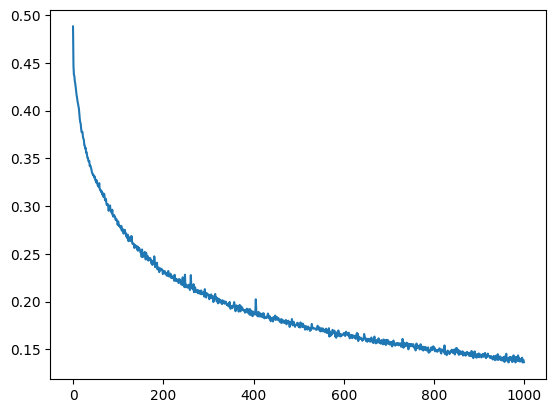

In [36]:
lstm_model_df = pd.DataFrame(lstm_model.history.history)
lstm_model_df['loss'].plot();

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
R2 Score: 0.775637351792122
SSE: 536.893414986009
MAE: 0.3063492522223438
AIC: 3338.121923210514
BIC: 3367.872672648774


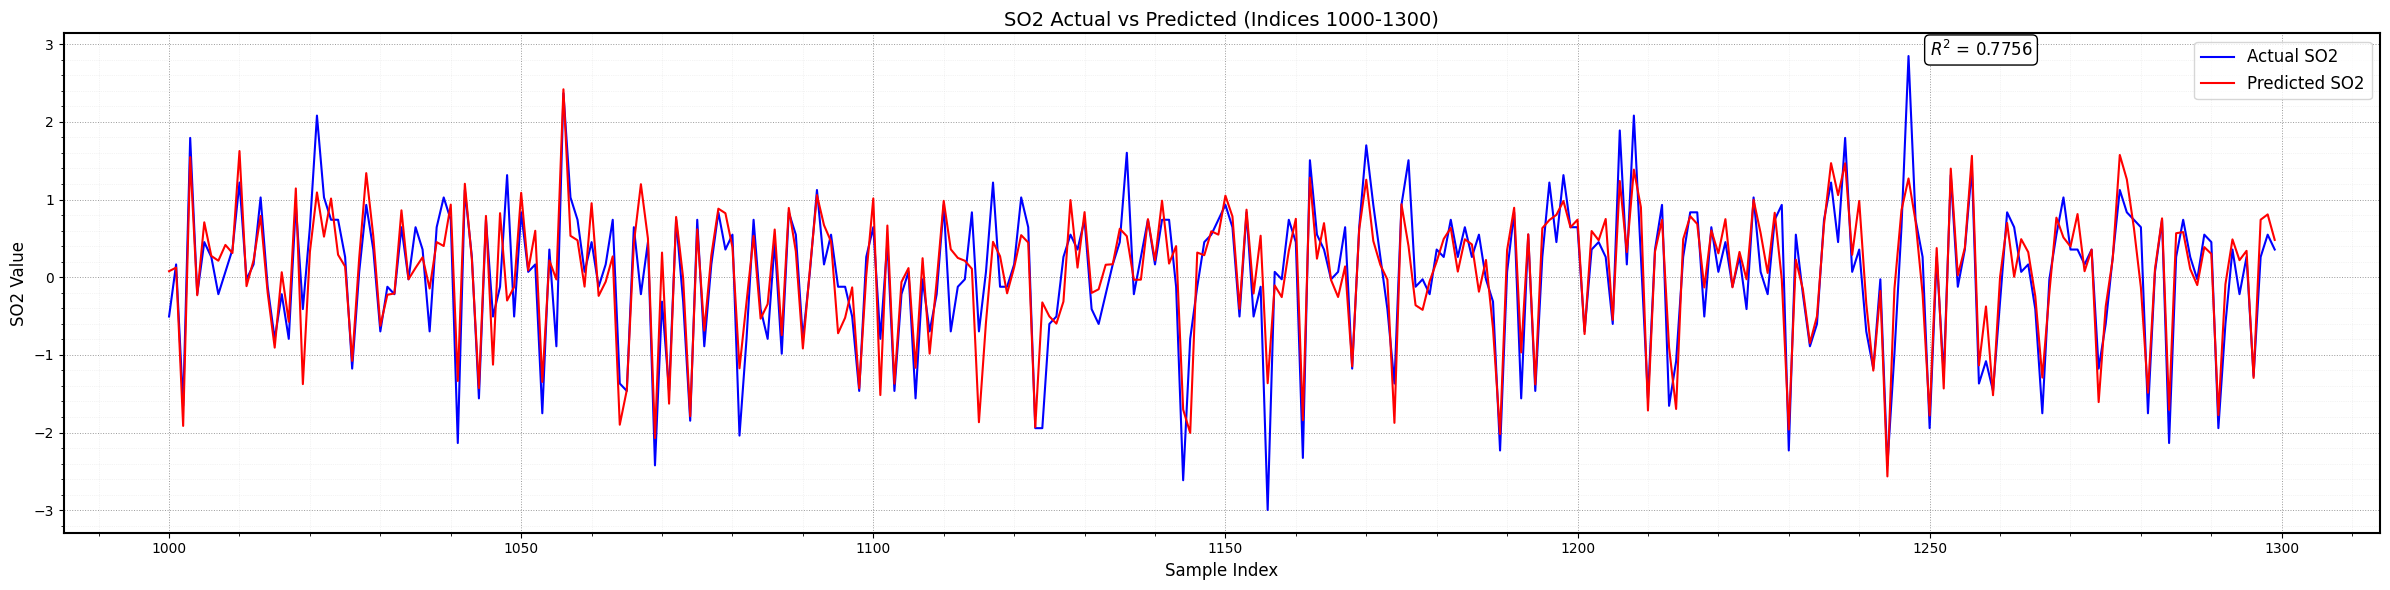

In [37]:
y_pred_lstm = lstm_model.predict(X_test)
result(y_test,y_pred_lstm,5)

In [38]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

# LSTM no-timesteps

In [49]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
Xy = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 - 1s - 6ms/step - loss: 0.2493
Epoch 1/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step   - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0564
Epoch 2/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0112
Epoch 3/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0116
Epoch 4/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0117
Epoch 5/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0119
Epoch 6/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0110
Epoch 7/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0111
Epoch 8/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0112
Epoch 9/10

Epoch 44/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0107
Epoch 45/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0106
Epoch 46/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0108
Epoch 47/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0104
Epoch 48/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0106
Epoch 49/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0109
Epoch 50/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0107
Epoch 51/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0104
Epoch 52/1000
89/89 ━━━━━━━━━━━━

Epoch 87/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0105
Epoch 88/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0098
Epoch 89/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0103
Epoch 90/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0102
Epoch 91/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0101
Epoch 92/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0098
Epoch 93/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0101
Epoch 94/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0100
Epoch 95/1000
89/89 ━━━━━━━━━━━━

Epoch 130/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0097
Epoch 131/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0097
Epoch 132/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0095
Epoch 133/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097
Epoch 134/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0101
Epoch 135/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097
Epoch 136/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0095
Epoch 137/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0094
Epoch 138/1000
89/89 ━━━

Epoch 173/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091
Epoch 174/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091
Epoch 175/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091
Epoch 176/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0091
Epoch 177/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0092
Epoch 178/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0094
Epoch 179/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0091
Epoch 180/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0091
Epoch 181/1000
89/89 ━━━

Epoch 216/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0086
Epoch 217/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0086
Epoch 218/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0082
Epoch 219/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0083
Epoch 220/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0081
Epoch 221/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
Epoch 220: R2 Score = 0.6061133798506686
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081
Epoch 222/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0085
Epoch 223/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/ste

Epoch 259/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0075
Epoch 260/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0078
Epoch 261/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 260: R2 Score = 0.6559683829734425
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0076
Epoch 262/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0078
Epoch 263/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0077
Epoch 264/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0079
Epoch 265/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0080
Epoch 266/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

Epoch 302/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0073
Epoch 303/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0072
Epoch 304/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0079
Epoch 305/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0073
Epoch 306/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0075
Epoch 307/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0074
Epoch 308/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0071
Epoch 309/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0074
Epoch 310/1000
89/89 ━━━━━━━━━

Epoch 345/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0070
Epoch 346/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0071
Epoch 347/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0067
Epoch 348/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0070
Epoch 349/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0070
Epoch 350/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0068
Epoch 351/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0068
Epoch 352/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0069
Epoch 353/1000
89/89 ━━━

Epoch 388/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0066
Epoch 389/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0064
Epoch 390/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0064
Epoch 391/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0064
Epoch 392/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0064
Epoch 393/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0065
Epoch 394/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0064
Epoch 395/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0066
Epoch 396/1000
89/89 ━━━

Epoch 431/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060
Epoch 432/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0062
Epoch 433/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0064
Epoch 434/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0062
Epoch 435/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0061
Epoch 436/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060
Epoch 437/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060
Epoch 438/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0061
Epoch 439/1000
89/89 ━━━━━━━━━

Epoch 474/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0059
Epoch 475/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060
Epoch 476/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0061
Epoch 477/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0057
Epoch 478/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059
Epoch 479/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060
Epoch 480/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059
Epoch 481/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 480: R2 Score = 0.7194894799035141
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

Epoch 517/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0057
Epoch 518/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0057
Epoch 519/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056
Epoch 520/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0057
Epoch 521/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 520: R2 Score = 0.7198986734816268
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0056
Epoch 522/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0056
Epoch 523/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0058
Epoch 524/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

Epoch 560/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0058
Epoch 561/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 560: R2 Score = 0.7031924160021381
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0055
Epoch 562/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0055
Epoch 563/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060
Epoch 564/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0055
Epoch 565/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0055
Epoch 566/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0059
Epoch 567/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step 

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054
Epoch 603/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052
Epoch 604/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 605/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0051
Epoch 606/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056
Epoch 607/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054
Epoch 608/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054
Epoch 609/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056
Epoch 610/1000
89/89 ━━━━━━━━━━━━━━━━━━

Epoch 645/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054
Epoch 646/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 647/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 648/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052
Epoch 649/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0054
Epoch 650/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0054
Epoch 651/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 652/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054
Epoch 653/1000
89/89 ━━━

Epoch 688/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0050
Epoch 689/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050
Epoch 690/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052
Epoch 691/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0051
Epoch 692/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0051
Epoch 693/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0051
Epoch 694/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0050
Epoch 695/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0051
Epoch 696/1000
89/89 ━━━━

Epoch 731/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 732/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050
Epoch 733/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048
Epoch 734/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052
Epoch 735/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048
Epoch 736/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050
Epoch 737/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049
Epoch 738/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049
Epoch 739/1000
89/89 ━━━

Epoch 774/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047
Epoch 775/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049
Epoch 776/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048
Epoch 777/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050
Epoch 778/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048
Epoch 779/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048
Epoch 780/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0051
Epoch 781/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 780: R2 Score = 0.7482930960222209
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

Epoch 817/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048
Epoch 818/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047
Epoch 819/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0049
Epoch 820/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049
Epoch 821/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 820: R2 Score = 0.7507562975798556
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0050
Epoch 822/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047
Epoch 823/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0050
Epoch 824/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

Epoch 860/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0046
Epoch 861/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
Epoch 860: R2 Score = 0.7479185700034426
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048
Epoch 862/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0048
Epoch 863/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0046
Epoch 864/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047
Epoch 865/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047
Epoch 866/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0047
Epoch 867/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047
Epoch 903/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0046
Epoch 904/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0046
Epoch 905/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0043
Epoch 906/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047
Epoch 907/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049
Epoch 908/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 909/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 910/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Epoch 945/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0044
Epoch 946/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047
Epoch 947/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 948/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 949/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0044
Epoch 950/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0044
Epoch 951/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 952/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045
Epoch 953/1000
89/89 ━━━

Epoch 988/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045
Epoch 989/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045
Epoch 990/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045
Epoch 991/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044
Epoch 992/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044
Epoch 993/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0044
Epoch 994/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0045
Epoch 995/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0043
Epoch 996/1000
89/89 ━━━━━━━

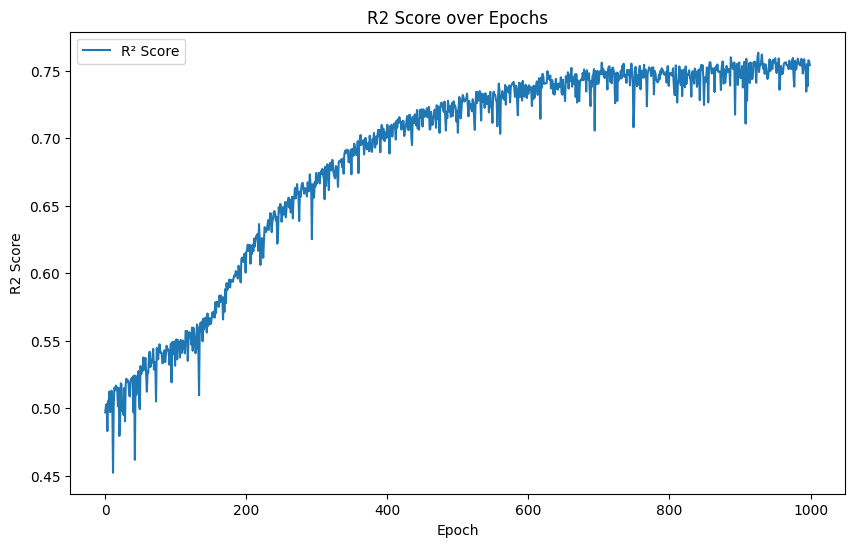

In [52]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential()

model.add(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.1))
#output
model.add(tf.keras.layers.Dense(units=1))
#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2 Score: 0.754175912124428
SSE: 14.70539614646728
MAE: 0.05082780473974125
AIC: -6864.629367226444
BIC: -6834.878617788185


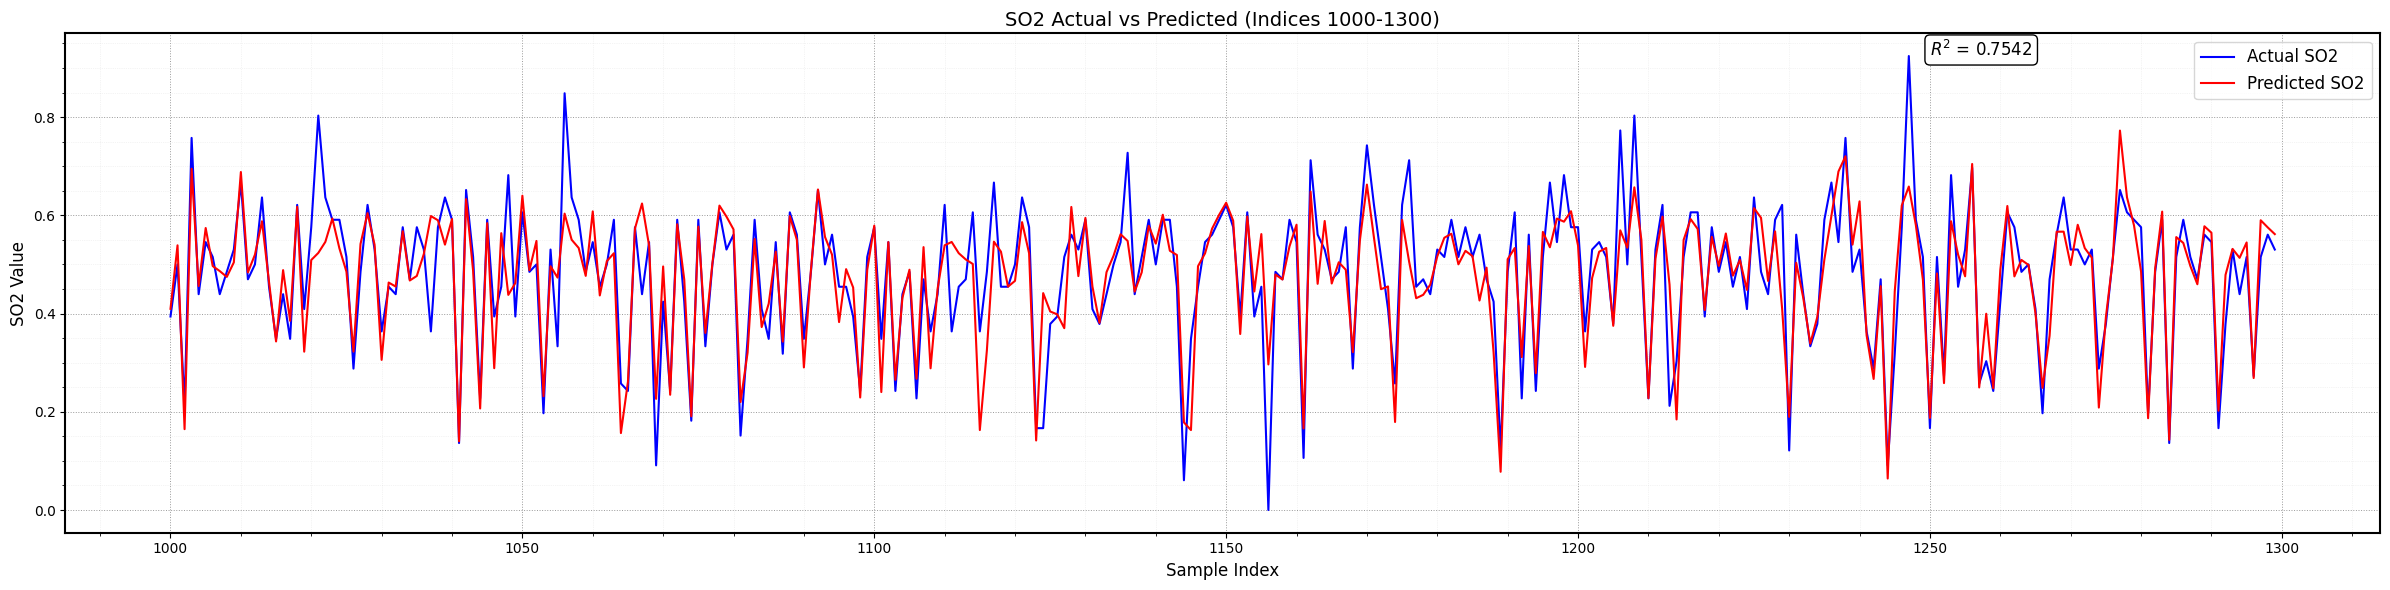

In [53]:
y_pred_model = model.predict(X_test)
result(y_test,y_pred_model,5)

In [54]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 1, 256)              │         268,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 1, 256)              │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,957,509 (15.10 MB)

 Trainable params: 1,319,169 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,638,340 (10.06 MB)

## Bi-directional LSTM

In [55]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
Xy = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 - 2s - 27ms/step - loss: 0.2471
Epoch 1/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step   - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0409
Epoch 2/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0109
Epoch 3/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step ep -
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0112
Epoch 4/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0110
Epoch 5/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0115
Epoch 6/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0110
Epoch 7/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0118
Epoch 8/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0111
Epoch 9/1000
89/89 ━━━━━━

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0110
Epoch 45/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0106
Epoch 46/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0104
Epoch 47/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0103
Epoch 48/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0111
Epoch 49/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0107
Epoch 50/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0105
Epoch 51/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0102
Epoch 52/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/17

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0099
Epoch 88/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0099
Epoch 89/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0102
Epoch 90/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0099
Epoch 91/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0098
Epoch 92/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0097
Epoch 93/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0100
Epoch 94/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0095
Epoch 95/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0100
Epoch 131/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0093
Epoch 132/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0094
Epoch 133/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0093
Epoch 134/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0094
Epoch 135/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0092
Epoch 136/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0090
Epoch 137/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0092
Epoch 138/1000
89/89 ━━━━━━━━━━━━━━━━━━━━

Epoch 173/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0083
Epoch 174/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0081
Epoch 175/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0086
Epoch 176/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0084
Epoch 177/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0086
Epoch 178/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0086
Epoch 179/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0087
Epoch 180/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0084
Epoch 181/1000
89/89 ━━━━━━━

Epoch 216/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0083
Epoch 217/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0079
Epoch 218/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0080
Epoch 219/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0079
Epoch 220/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0079
Epoch 221/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step ep
Epoch 220: R2 Score = 0.6464235992040936
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0077
Epoch 222/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0082
Epoch 223/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0079
E

Epoch 259/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0073
Epoch 260/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0073
Epoch 261/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
Epoch 260: R2 Score = 0.6768006992191142
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0073
Epoch 262/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0072
Epoch 263/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0073
Epoch 264/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0071
Epoch 265/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0072
Epoch 266/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step 

Epoch 302/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0067
Epoch 303/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0067
Epoch 304/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0069
Epoch 305/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0064
Epoch 306/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0062
Epoch 307/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0065
Epoch 308/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0063
Epoch 309/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0063
Epoch 310/1000
89/89 ━━━━━

Epoch 345/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0058
Epoch 346/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0062
Epoch 347/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0060
Epoch 348/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0061
Epoch 349/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0062
Epoch 350/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0061
Epoch 351/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0061
Epoch 352/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0060
Epoch 353/1000
89/89 ━━━━━

Epoch 388/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0055
Epoch 389/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0058
Epoch 390/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0059
Epoch 391/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0056
Epoch 392/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0055
Epoch 393/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0058
Epoch 394/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0057
Epoch 395/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0058
Epoch 396/1000
89/89 ━━━━━━━

Epoch 431/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0053
Epoch 432/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0057
Epoch 433/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0060
Epoch 434/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0053
Epoch 435/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0053
Epoch 436/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0055
Epoch 437/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0054
Epoch 438/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0054
Epoch 439/1000
89/89 ━━━━━━━━━━━

Epoch 474/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0049
Epoch 475/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0050
Epoch 476/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0052
Epoch 477/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0052
Epoch 478/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0049
Epoch 479/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0052
Epoch 480/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0050
Epoch 481/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
Epoch 480: R2 Score = 0.718726207185088
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - los

Epoch 517/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0050
Epoch 518/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0049
Epoch 519/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0048
Epoch 520/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0050
Epoch 521/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
Epoch 520: R2 Score = 0.7464429408024935
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0049
Epoch 522/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0047
Epoch 523/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0050
Epoch 524/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss

Epoch 560/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0046
Epoch 561/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
Epoch 560: R2 Score = 0.7371317067970338
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044
Epoch 562/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0047
Epoch 563/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0045
Epoch 564/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0048
Epoch 565/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0049
Epoch 566/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0045
Epoch 567/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - lo

Epoch 603/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0044
Epoch 604/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0043
Epoch 605/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0047
Epoch 606/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0047
Epoch 607/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0044
Epoch 608/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0045
Epoch 609/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0045
Epoch 610/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0046
Epoch 611/1000
89/89 ━━━━━━━━━━━━━━━━━

Epoch 646/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0043
Epoch 647/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0044
Epoch 648/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0042
Epoch 649/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044
Epoch 650/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044
Epoch 651/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0042
Epoch 652/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0045
Epoch 653/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0043
Epoch 654/1000
89/89 ━━━━━━━━━━━━━

Epoch 689/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0042
Epoch 690/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0042
Epoch 691/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0043
Epoch 692/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0041
Epoch 693/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0044
Epoch 694/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0041
Epoch 695/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0043
Epoch 696/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044
Epoch 697/1000
89/89 ━━━━━━━━━

Epoch 732/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0043
Epoch 733/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0040
Epoch 734/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0039
Epoch 735/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0040
Epoch 736/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0041
Epoch 737/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0040
Epoch 738/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0040
Epoch 739/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0042
Epoch 740/1000
89/89 ━━━━━━━━━━━

Epoch 775/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0040
Epoch 776/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0039
Epoch 777/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0039
Epoch 778/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0039
Epoch 779/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0045
Epoch 780/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0038
Epoch 781/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
Epoch 780: R2 Score = 0.7496918619534836
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0041
Epoch 782/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - 

Epoch 818/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - loss:
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0037
Epoch 819/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0040
Epoch 820/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0039
Epoch 821/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
Epoch 820: R2 Score = 0.7486507890415003
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0039
Epoch 822/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0038
Epoch 823/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0040
Epoch 824/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0041
Epoch 825/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0038

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
Epoch 860: R2 Score = 0.7524247291127264
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0045
Epoch 862/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0037
Epoch 863/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0038
Epoch 864/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step ep -
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0035
Epoch 865/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0037
Epoch 866/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0038
Epoch 867/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0037
Epoch 868/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0038
Epoch 869/1000
89/89 ━━━━━━━━━

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0037
Epoch 905/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0037
Epoch 906/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 907/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0035
Epoch 908/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - l
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0038
Epoch 909/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 910/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 911/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0038
Epoch 912/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep 

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 948/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0037
Epoch 949/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0038
Epoch 950/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0036
Epoch 951/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0037
Epoch 952/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 953/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 954/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0035
Epoch 955/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step e

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0033
Epoch 991/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0035
Epoch 992/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0035
Epoch 993/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0037
Epoch 994/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0034
Epoch 995/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 996/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0036
Epoch 997/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step ep - los
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0035
Epoch 998/1000
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step e

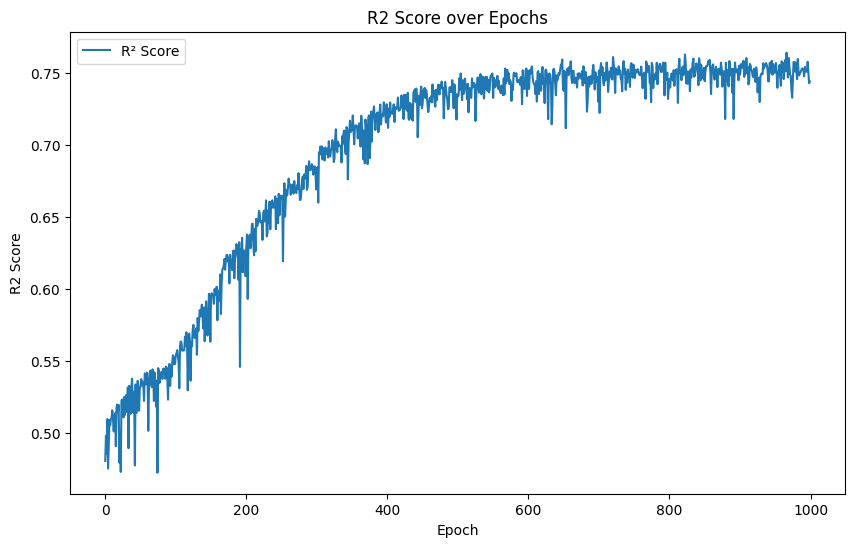

In [57]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential([
    Bidirectional(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5))),
    tf.keras.layers.Dropout(0.05),
    Bidirectional(LSTM(units = 256,activation='tanh',return_sequences=True)),
    tf.keras.layers.Dropout(0.05),
    Bidirectional(LSTM(units = 256,activation='tanh')),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=1),
])


#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R2 Score: 0.7443328516730918
SSE: 15.294215999238542
MAE: 0.05125443710005394
AIC: -6753.287421765912
BIC: -6723.536672327653


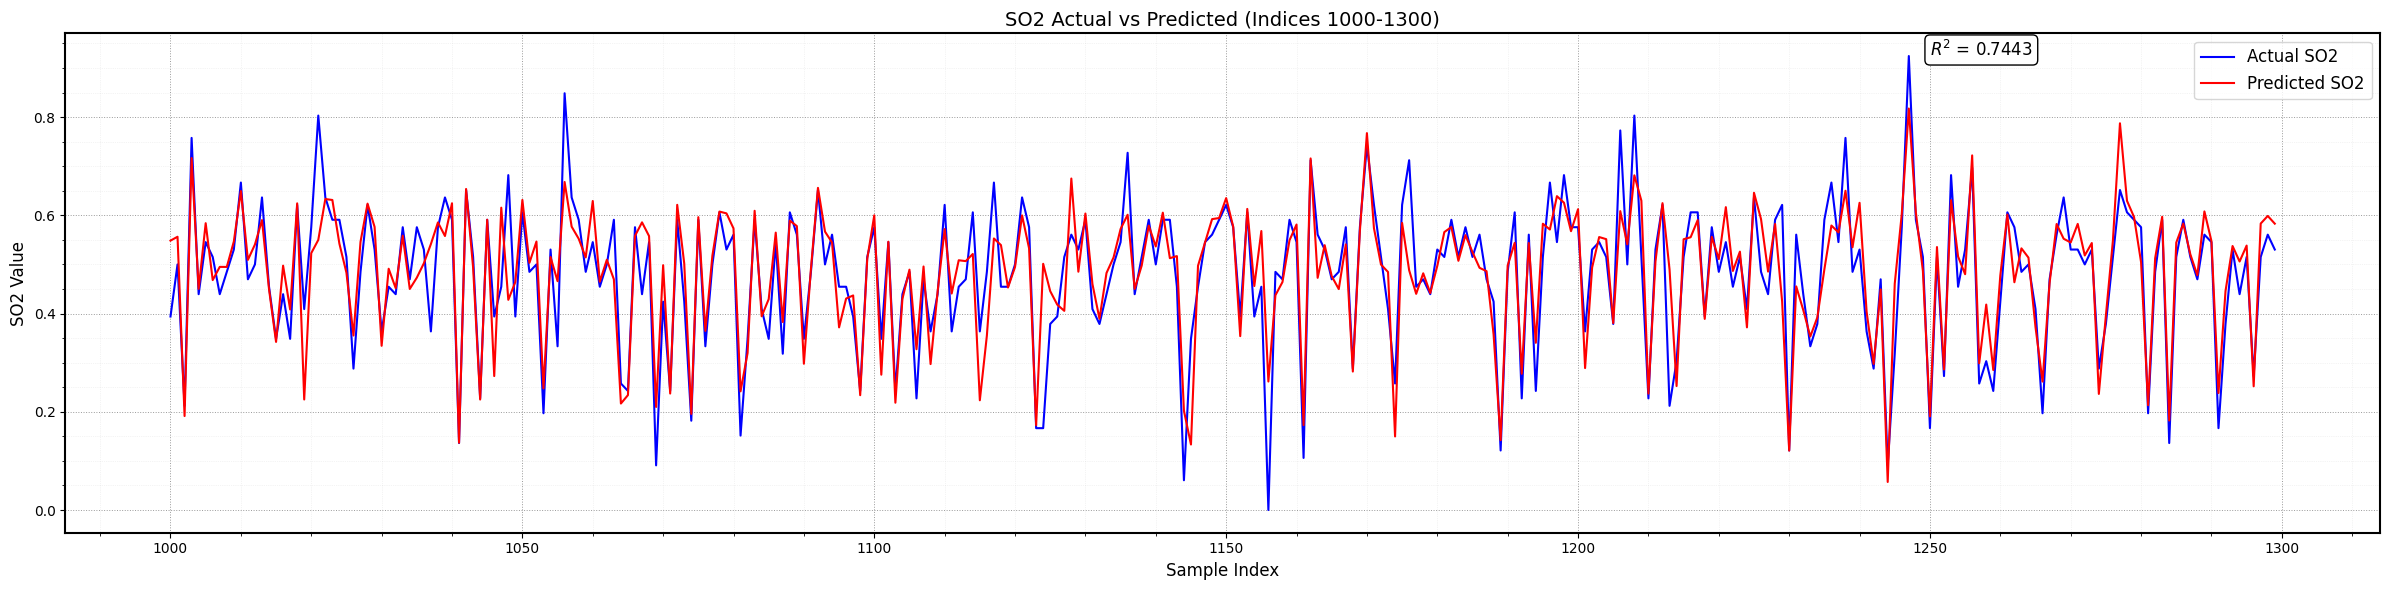

In [58]:
y_pred_bi = model.predict(X_test)
result(y_test,y_pred_bi,5)